In [14]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
from scipy.stats import laplace, norm
from scipy.optimize import curve_fit
from scipy.stats import norm, laplace

from scipy.stats import anderson_ksamp, ks_2samp, shapiro
from scipy.optimize import curve_fit
%matplotlib inline

Total data used 200/200
sig_level 0.46628639073563594


/home/naireen/Documents/pythonVirtualEnvs/ROB501/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()


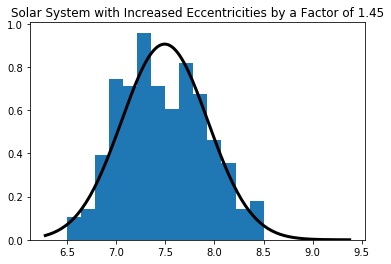

In [15]:
def plot_dists(efac, bins = [None], stat_tests=False, plot_gaussian = True):
    #efac = 1.45
    data = pd.read_csv("../csvs/other/solar_{0}_1e9_200.csv".format(efac), index_col=0)
    times = data["t"].values
    total = times.shape[0]
    #print(total)
    times = np.log10(times//2./np.pi)
    is_valid = np.where(np.isnan(times) ==False)[0]
    #print(is_valid.shape)
    valid_times = times[is_valid]
    final = is_valid.shape[0]
    print("Total data used {0}/{1}".format(final, total))
    if bins[0] == None:
        plt.hist(valid_times, normed = 1)
    else:
        plt.hist(valid_times, normed = 1, bins = bins)
    #plt.axvline(np.log10(5000000000))
    
    plt.title("Solar System with Increased Eccentricities by a Factor of {0}".format(efac) )
    mu_fit, sig_fit =  norm.fit(valid_times)
    
    # mean sigma from non resonant systems
    rv = norm(loc = mu_fit, scale = 0.44)
    x= np.linspace(valid_times.min() - 0.25, valid_times.max()+0.25, 150)
    
    if plot_gaussian:
        plt.plot(x, rv.pdf(x), linewidth = 3, color = "black")
    
    #determine significance of gaussain fit
    np.random.seed(0)
    test = np.random.normal(loc=mu_fit, scale=0.44, size = valid_times.shape[0])
    #plt.figure()
    #plt.hist(test)
    #plt.hist(valid_times)
    if stat_tests:
        try:
            statistic, p_val = ks_2samp(times, test)
        except:
            statistic, p_val = 0,0
        print("sig_level", p_val)
    
#plot_dists(1.45)
bins = np.linspace(6.5, 8.5, 15)
plot_dists(1.45, bins = bins, stat_tests=True)

Total data used 193/200
sig_level 0.8544697646193281


/home/naireen/Documents/pythonVirtualEnvs/ROB501/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()


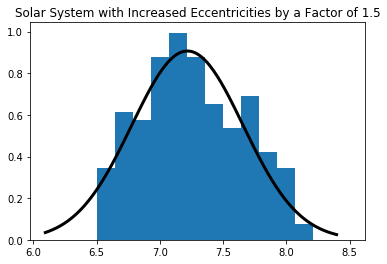

In [12]:
bins = np.linspace(6.5, 8.5, 15)
plot_dists(1.5, bins = bins, stat_tests=True)

Total data used 161/200
sig_level 1.2220478001210662e-17


/home/naireen/Documents/pythonVirtualEnvs/ROB501/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


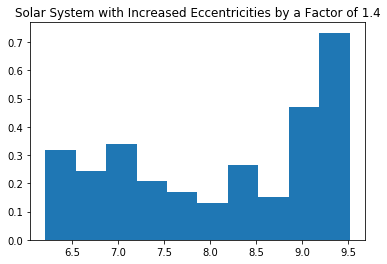

In [13]:
bins = np.linspace(6.5, 8.5, 15)
plot_dists(1.4, stat_tests=True, plot_gaussian=False)